### Load packages

In [8]:
import bplp.solve as solve
from bplp.BayesLP import BayesLP
from bplp.plot import plot_joint_marginal
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

### Setup the problem

In [9]:
bp_program = BayesLP()

# number of bins (resolution of the state and message space)
bp_program.n = 100

# state and message type space (unit interval)
bp_program.interval = [0, 1]

# receiver's utility function
bp_program.u = lambda s, r: s - r

# pdf of receiver's type conditional on state s
bp_program.g = lambda s, r: 1

# prior distribution of s
bp_program.prior = lambda s: norm.pdf(s - 0.5)

# sender's expected utility function
bp_program.v = lambda s, m: np.sqrt(m)

### Solve for the primal

In [10]:
primal = solve.bayes_primal(bp_program)

In [11]:
# Extract results
mechanism = primal["mechanism"]
prior = primal["prior"]
ic = primal["ic_constraint"]
value_mat = primal["value_mat"]

In [12]:
# Calculate sender's expected utility from the mechanism
n = bp_program.n
value_vec = value_mat.reshape((n**2))
mechanism_vec = mechanism.reshape((n**2))

total_utility = np.dot(value_vec, mechanism_vec)
print("Total expected utility for the sender is: " + str(total_utility))

Total expected utility for the sender is: 0.7070977625729108


### Plot mechanism

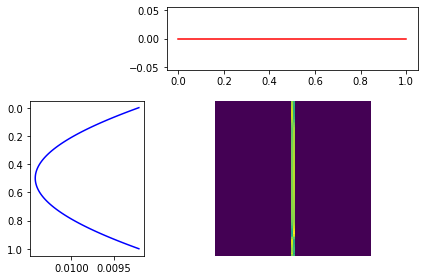

In [13]:
joint_marginal = plot_joint_marginal(bp_program, prior, ic, mechanism)

### Solve for the dual